TODO : try with more digits
TODO: archi homeo + mask + channels = [8, 16, 16]
TODO: pooling spatial

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import os
import pickle
import datetime
from mix_Network import *

dataset = 'nmnist'
records_path = '../Records'
timestr = datetime.datetime.now().date().isoformat()
timestr = '2020-12-21'

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

homeo = True
sigma = None
pooling = False
homeinv = False
jitter = False
tau = 5
nb_train = 500
nb_test = 100
krnlinit = 'first'
nblay = 3
nbclust = 4

In [3]:
def makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test):
    hotshom = network(krnlinit=krnlinit, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learning1by1(dataset=dataset)
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)
    hotshom.plotlayer()  
    if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):       
        trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_train)
        testmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_test)
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
            pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
            trainmaphom, testmaphom = pickle.load(file)
    histoscore(trainmaphom,testmaphom)
    return hotshom, loaderhom, order, trainmaphom, testmaphom

# Hots with homeostasis (best results of nbk NEW HOTS 02)

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_5_True_None_False_False


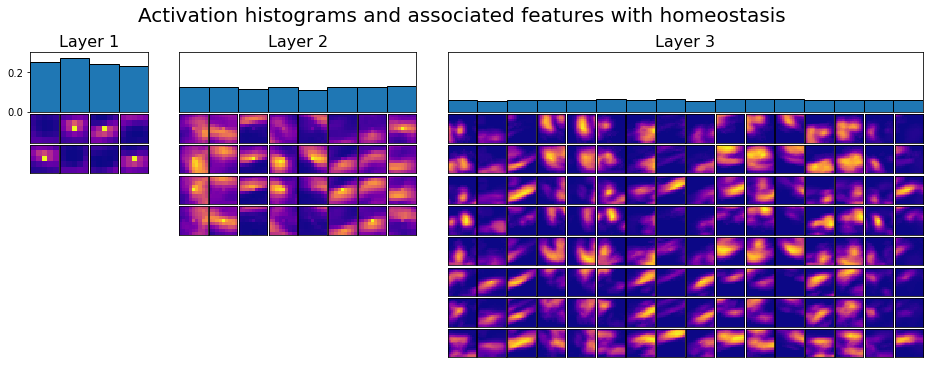

(9, array([128., 165., 212., 200., 225., 114., 142., 174., 170., 181., 153.,
       221., 140., 193., 102., 167.])) (4, array([160., 243., 273., 299., 341., 195., 276., 283., 291., 345., 303.,
       304., 215., 288., 128., 244.]))
Classification scores: bhatta = 76.0% - eucli = 76.0% - norm = 77.0% - 3-NN = 81.0% - 6-NN = 86.0%


In [4]:
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Testing different tauz

../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_0.1_True_None_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


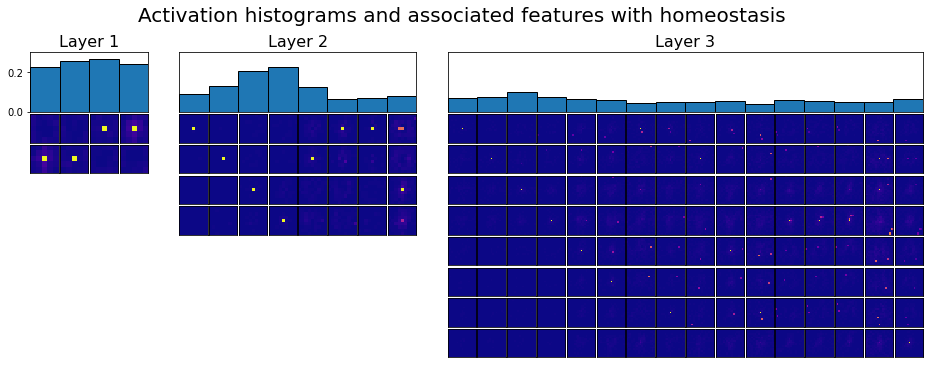


(6, array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])) (8, array([1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))
Classification scores: bhatta = 6.0% - eucli = 6.0% - norm = 7.000000000000001% - 3-NN = 10.0% - 6-NN = 26.0%
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_0.5_True_None_False_False


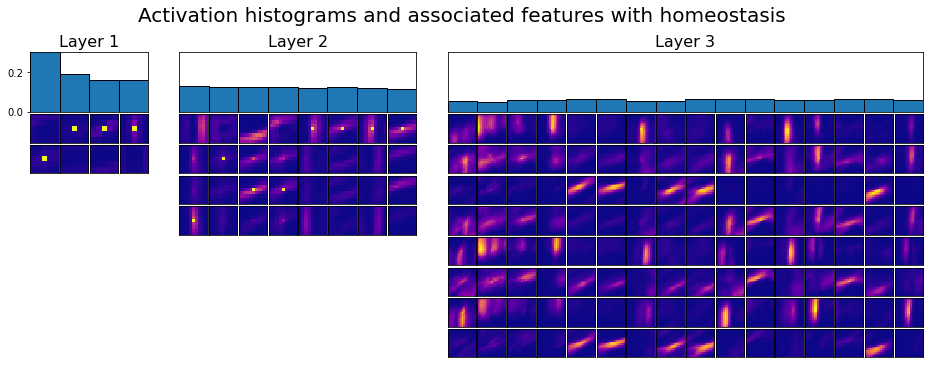

(tensor([3]), array([0.04744926, 0.06472847, 0.06143719, 0.07350521, 0.08667032,
       0.07953922, 0.06966539, 0.07268239, 0.07076248, 0.04443225,
       0.05019199, 0.07377948, 0.04141525, 0.04662644, 0.07624794,
       0.0408667 ])) (tensor([0]), array([0.05126468, 0.05781391, 0.06052394, 0.07000903, 0.08604336,
       0.0799458 , 0.07565492, 0.07384824, 0.07904246, 0.04719964,
       0.03771454, 0.07226739, 0.04177958, 0.04177958, 0.07881662,
       0.0462963 ]))
Classification scores: bhatta = 66.0% - eucli = 67.0% - norm = 67.0% - 3-NN = 0.0% - 6-NN = 0.0%
../Records/EXP_03_NMNIST/2020-12-21_hots_nmnist_[4, 8, 16]_1_True_None_False_False
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


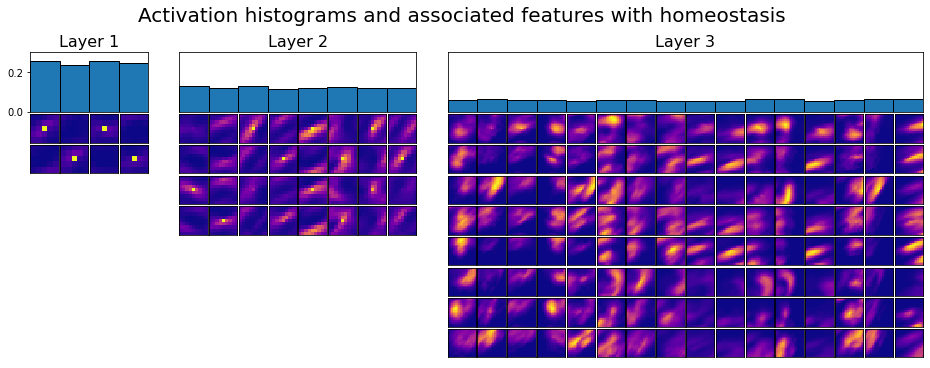

In [ ]:
for tau in [0.1, 0.5, 1, 2, 5, 10, 20, 50]:
    makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Testing different architectures

In [ ]:
tau = 5
for nblayerz in [1, 2, 3]:
    for nbclust in [4, 8, 16]:
        makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Filtering all TS on the best results

In [ ]:
hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_filtall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}.pkl'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learning1by1(filtering='all')
    with open(fname+'_model', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
        
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

## Stronger filter on the best results

In [ ]:
hotshom = network(krnlinit='first', tau=tau, homeo=homeo, filt=5)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_filtallx5_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}.pkl'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learning1by1(filtering='all')
    with open(fname+'_model', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
        
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# No homeostasis on the best results

In [ ]:
homeo = False
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Training all layers at the same time

## With homeostasis

In [ ]:
homeo = True

hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_learnall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learningall()
    with open(fname+'_model', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
        
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

## Without homeostasis

In [ ]:
homeo = False

hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learningall()
    with open(fname+'_model', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
        
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
    hotshom.plotlayer()
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

## Varying $\tau$

In [ ]:
homeo = True
for tau in [0.1, 0.5, 1, 2, 5, 10, 20]:
    hotshom = network(krnlinit='first', tau=tau, homeo=homeo)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = "../Records/EXP_01_LagorceKmeans/2020-12-03-mix_hots_learnall_"+dataset+hotshom.L[-1].krnlinit+str(tau)+str(homeo)+str(arch)+'.pkl'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learningall()
        with open(fname+'_model', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)
    hotshom.plotlayer()
    if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
        trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
        testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
            pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
            trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

# Training on more videos

In [ ]:
nb_train = 2000
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Activation maps

In [ ]:
    hotshom = network(krnlinit=krnlinit, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learning1by1(dataset=dataset)
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)

In [ ]:
trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = 1, to_record=True)
hotshom.plotactiv()

In [ ]:
    hotshom = network(krnlinit=krnlinit, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_learnall_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}'
    print(fname)
    if not os.path.isfile(fname+'_model.pkl'):
        loaderhom, order = hotshom.learningall(dataset=dataset)
        with open(fname+'_model.pkl', 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname+'_model.pkl', 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)

In [ ]:
trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = 1, to_record=True)
hotshom.plotactiv()

# Apply gaussian masking to the kernels

In [ ]:
for sigma in np.arange(0.5,1.6,0.1):
    makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Add spatial jitter for pooling

In [ ]:
sigma = None
jitter = True
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Add translation invarianve preference

In [ ]:
jitter = False
homeinv = True
makehisto(tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test);

# Pooling

In [ ]:
pooling = True
hotshom = poolingnetwork(krnlinit='first', tau=tau, homeo=homeo)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learning1by1()
    with open(fname+'_model.pkl', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model.pkl', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
hotshom.plotlayer()
if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))

In [ ]:
trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = 2, to_record=True)
hotshom.plotactiv()

In [ ]:
pooling = True
nbclust = 8
hotshom = poolingnetwork(krnlinit='first', tau=tau, homeo=homeo, nbclust=nbclust)
arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{tau}_{homeo}_{sigma}_{pooling}_{homeinv}_{jitter}'
print(fname)
if not os.path.isfile(fname+'_model.pkl'):
    loaderhom, order = hotshom.learning1by1()
    with open(fname+'_model.pkl', 'wb') as file:
        pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+'_model.pkl', 'rb') as file:
        hotshom, loaderhom, order = pickle.load(file)
hotshom.plotlayer()

if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}.pkl'):
    trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    testmaphom, loaderhom, _ = hotshom.running(loaderhom, order)
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'wb') as file:
        pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname+f'_histo_{nb_train}_{nb_test}.pkl', 'rb') as file:
        trainmaphom, testmaphom = pickle.load(file)
    print(accuracy(trainmaphom, testmaphom, 'bhatta'))